In [1]:
%matplotlib inline
import h5py
import numpy as np
import random
from PIL import Image
from matplotlib import pyplot as plt
import utils_visu
%load_ext autoreload
%autoreload 2

In [2]:
PATH_DATA = 'data/train/eightieth.h5'

In [3]:
CLASSES_NAMES = dict([
    (0, 'Post-flooding or irrigated croplands (or aquatic)'), 
    (1, 'Rainfed croplands'), 
    (2, 'Mosaic cropland (50-70%) / vegetation (grassland/shrubland/forest) (20-50%)'), 
    (3, 'Mosaic vegetation (grassland/shrubland/forest) (50-70%) / cropland (20-50%)'), 
    (4, 'Closed to open (>15%) broadleaved evergreen or semi-deciduous forest (>5m)'), 
    (5, 'Closed (>40%) broadleaved deciduous forest (>5m)'), 
    (6, 'Open (15-40%) broadleaved deciduous forest/woodland (>5m)'), 
    (7, 'Closed (>40%) needleleaved evergreen forest (>5m)'), 
    (8, 'Open (15-40%) needleleaved deciduous or evergreen forest (>5m)'), 
    (9, 'Closed to open (>15%) mixed broadleaved and needleleaved forest (>5m)'), 
    (10, 'Mosaic forest or shrubland (50-70%) / grassland (20-50%)'), 
    (11, 'Mosaic grassland (50-70%) / forest or shrubland (20-50%)'), 
    (12, 'Closed to open (>15%) (broadleaved or needleleaved, evergreen or deciduous) shrubland (<5m)'), 
    (13, 'Closed to open (>15%) herbaceous vegetation (grassland, savannas or lichens/mosses)'), 
    (14, 'Sparse (<15%) vegetation'), 
    (15, 'Closed to open (>15%) broadleaved forest regularly flooded (semi-permanently or temporarily) - Fresh or brackish water'), 
    (16, 'Closed (>40%) broadleaved forest or shrubland permanently flooded - Saline or brackish water'), 
    (17, 'Closed to open (>15%) grassland or woody vegetation on regularly flooded or waterlogged soil - Fresh, brackish or saline water'), 
    (18, 'Artificial surfaces and associated areas (Urban areas >50%)'), 
    (19, 'Bare areas'), 
    (20, 'Water bodies'), 
    (21, 'Permanent snow and ice'), 
    (22, 'No data (burnt areas, clouds,...)')
    ])

In [4]:
data = h5py.File(PATH_DATA,'r')

In [12]:
# get the histogram equalization table for RGB data
rgb_data = data["S2"][:,:,:,0:3]
cdf_rgb = utils_visu.get_equalization_table(rgb_data, type = 'flat')

In [13]:
# get the histogram equalization table for infrared data
ir_data = data["S2"][:,:,:,3]
cdf_ir = utils_visu.get_equalization_table(ir_data)

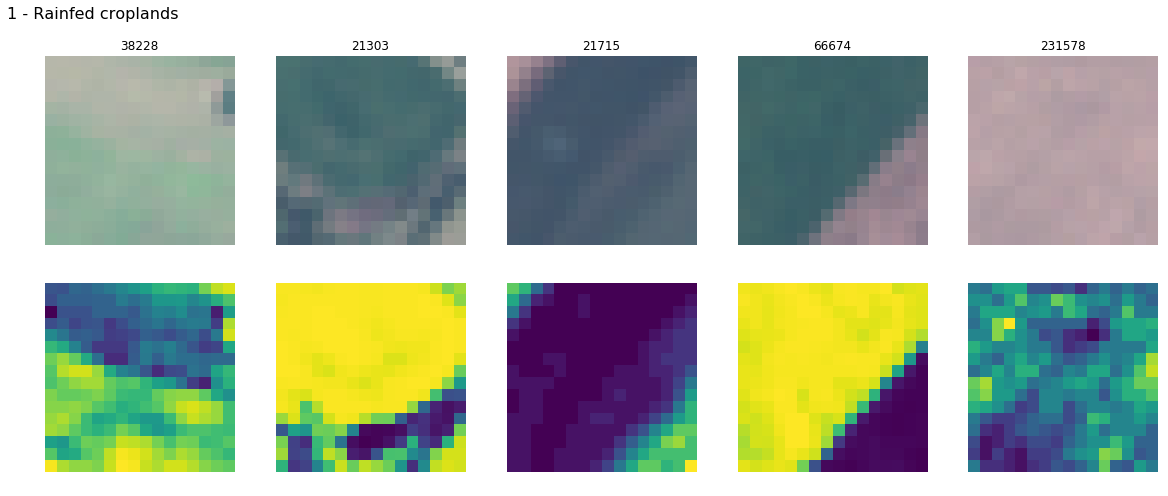

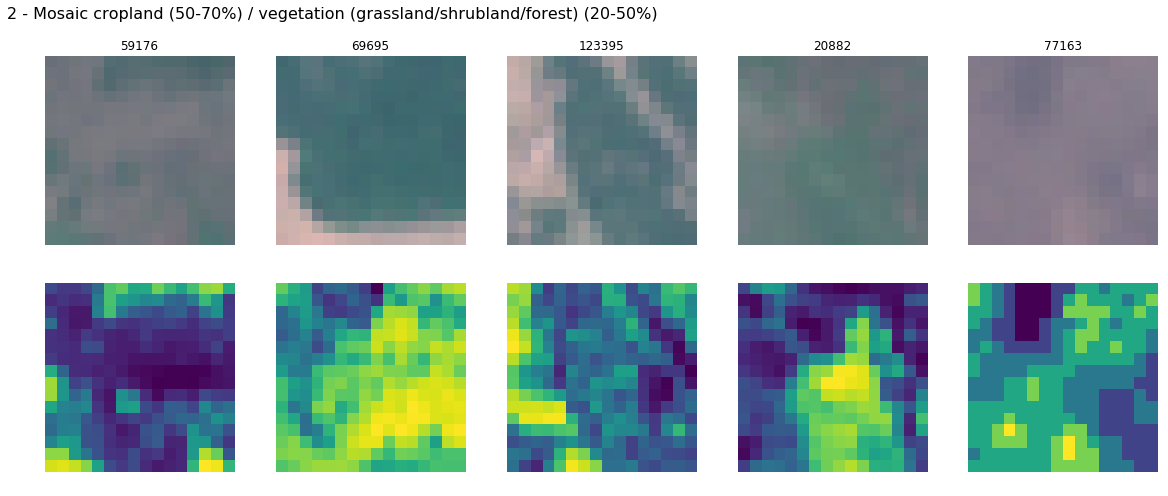

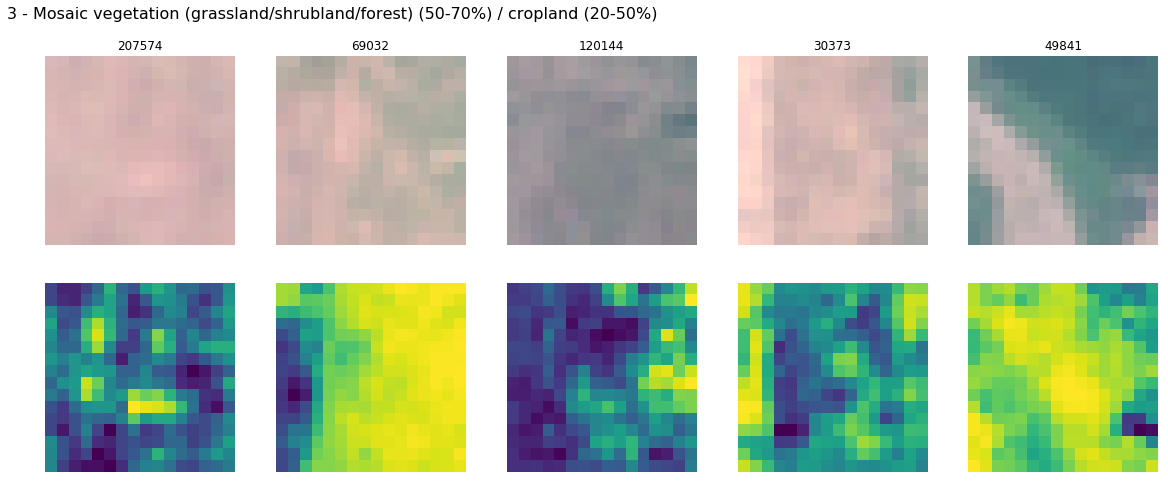

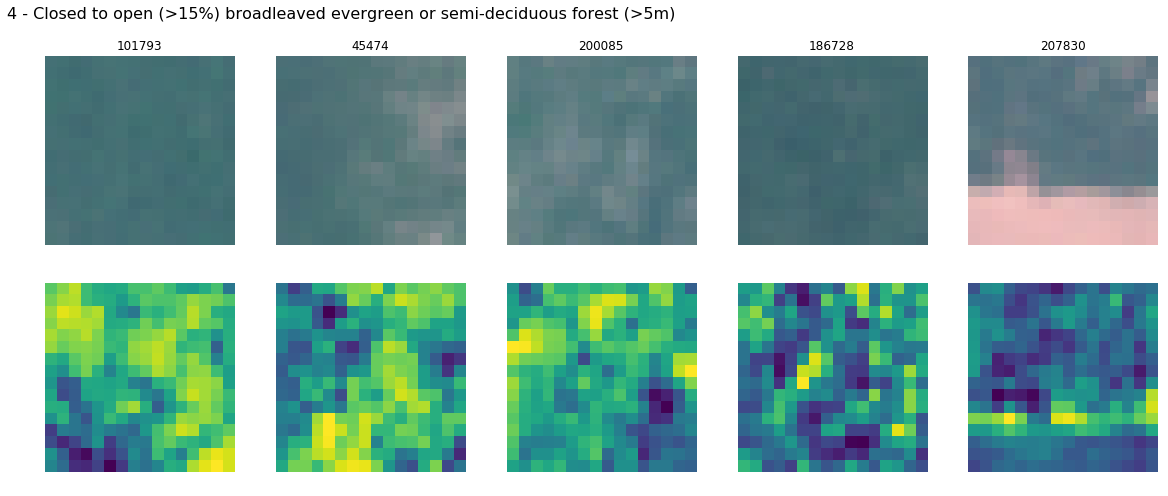

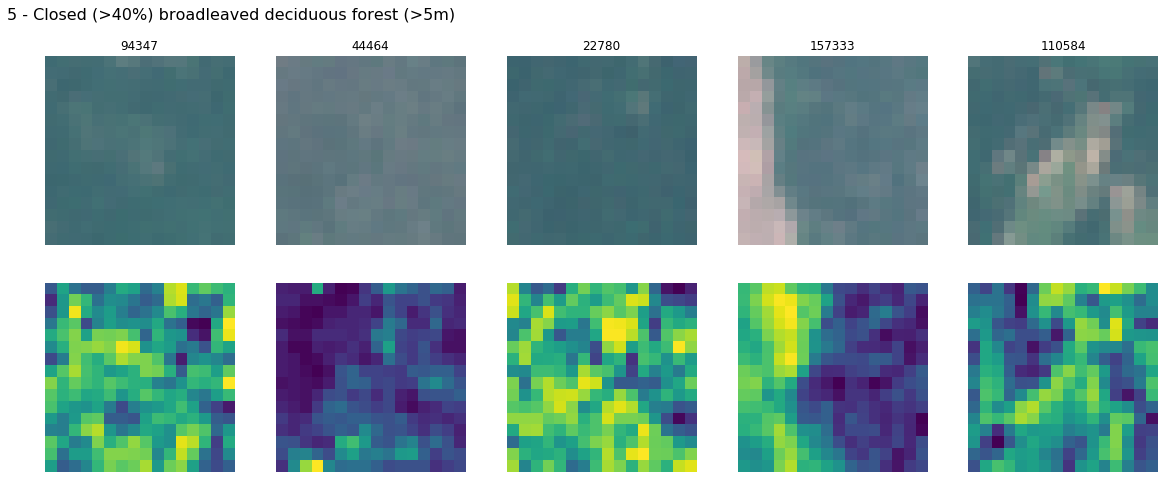

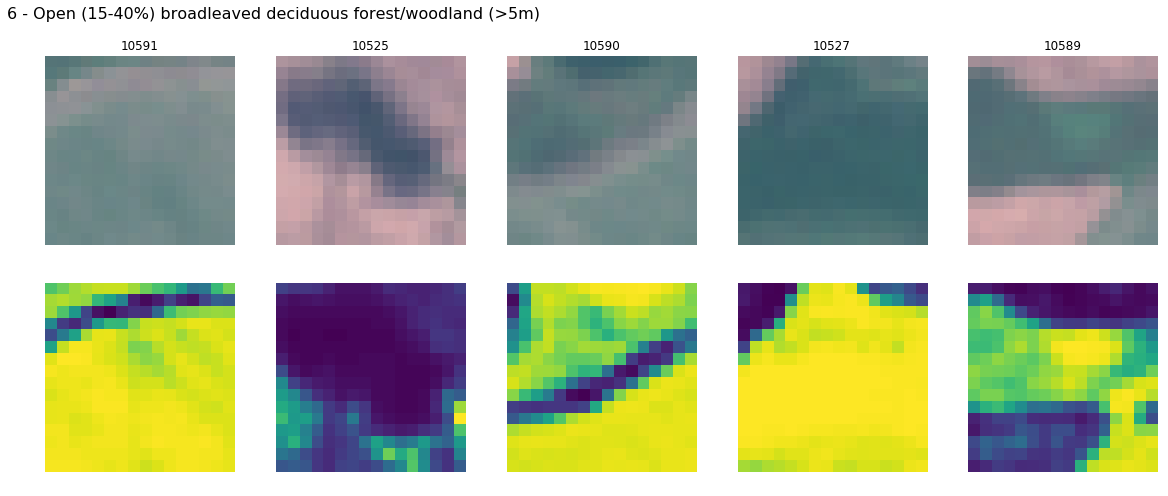

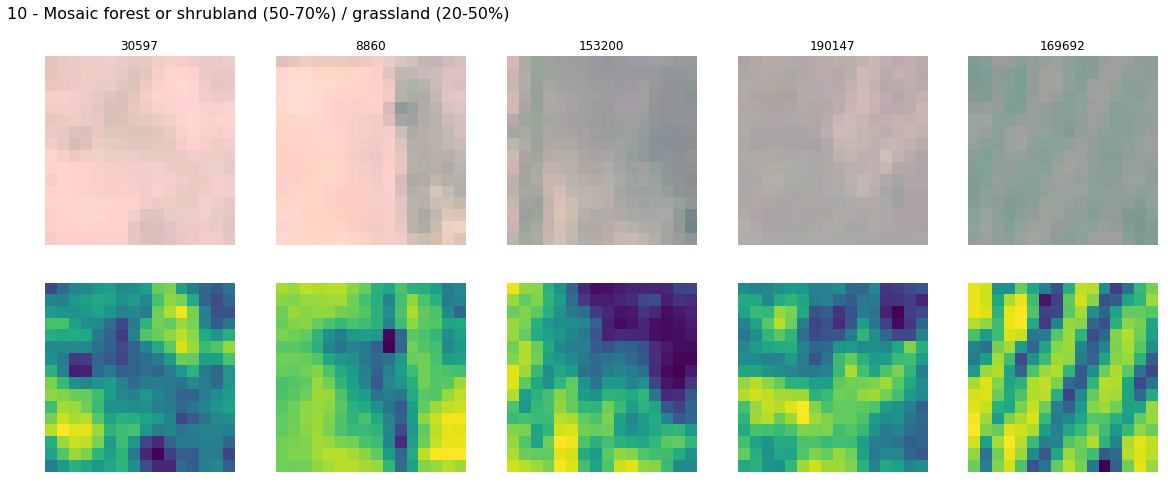

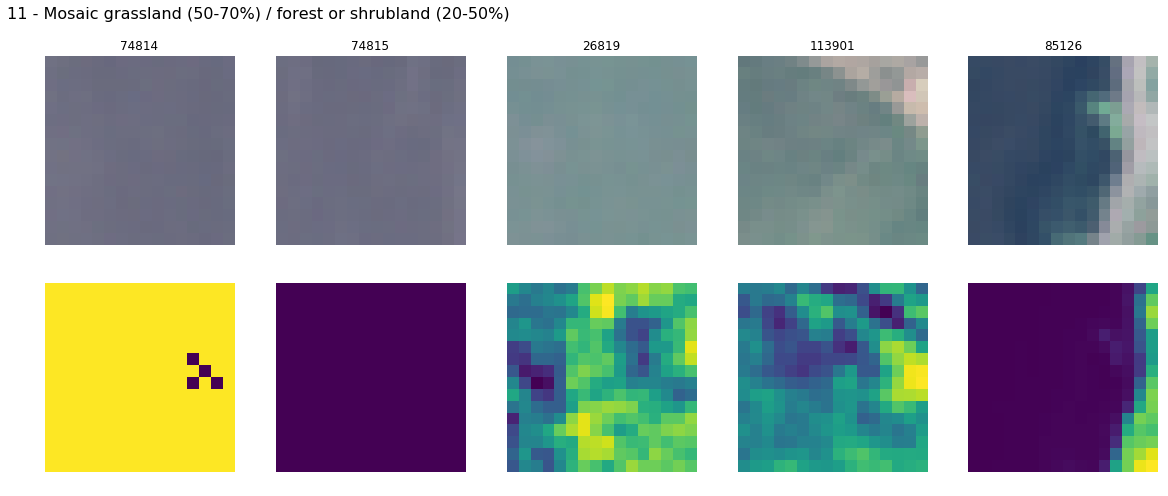

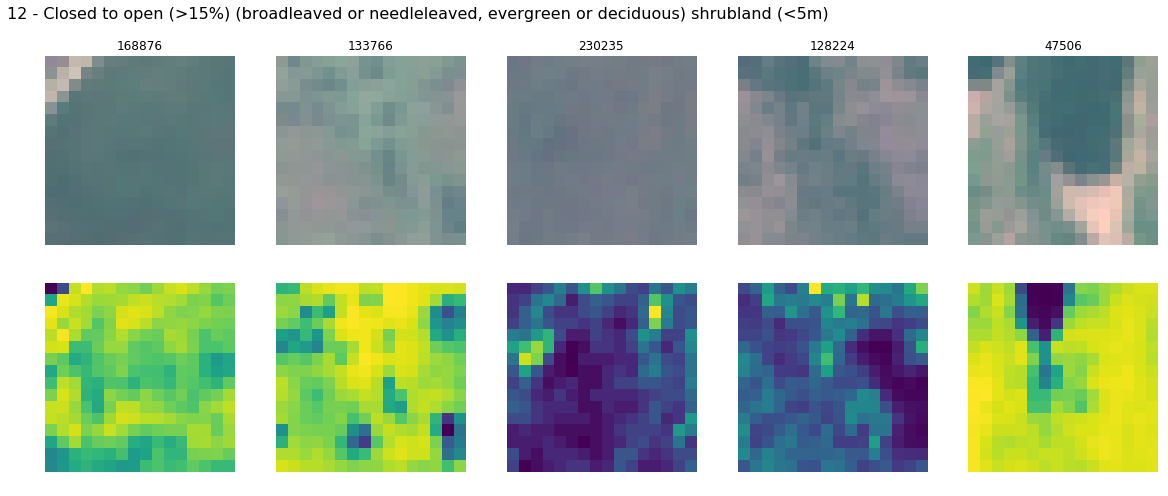

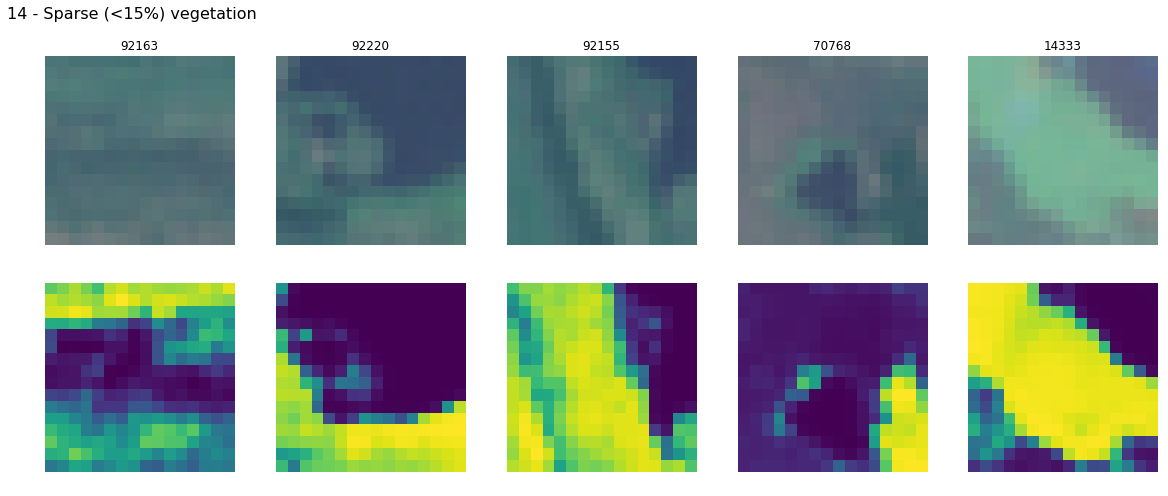

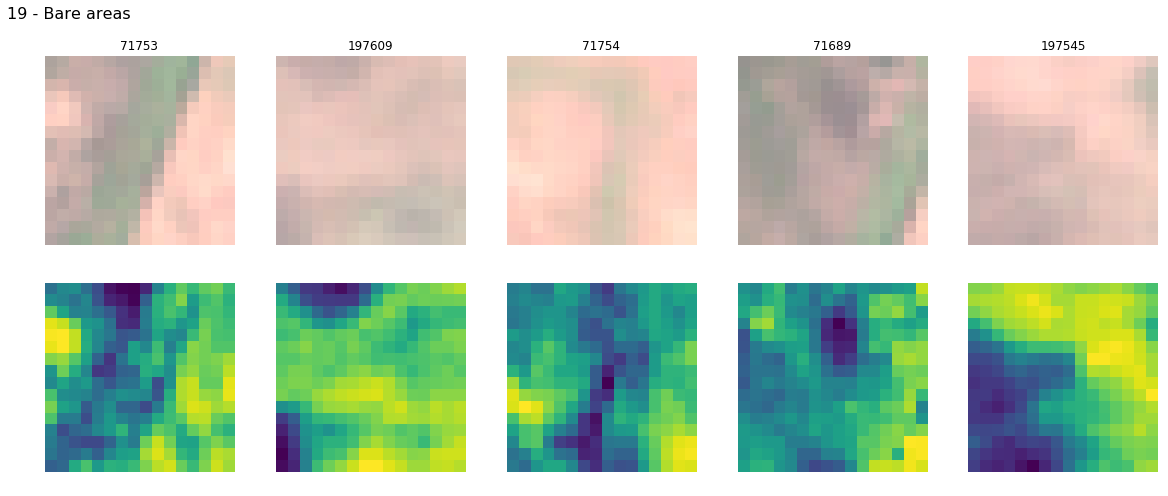

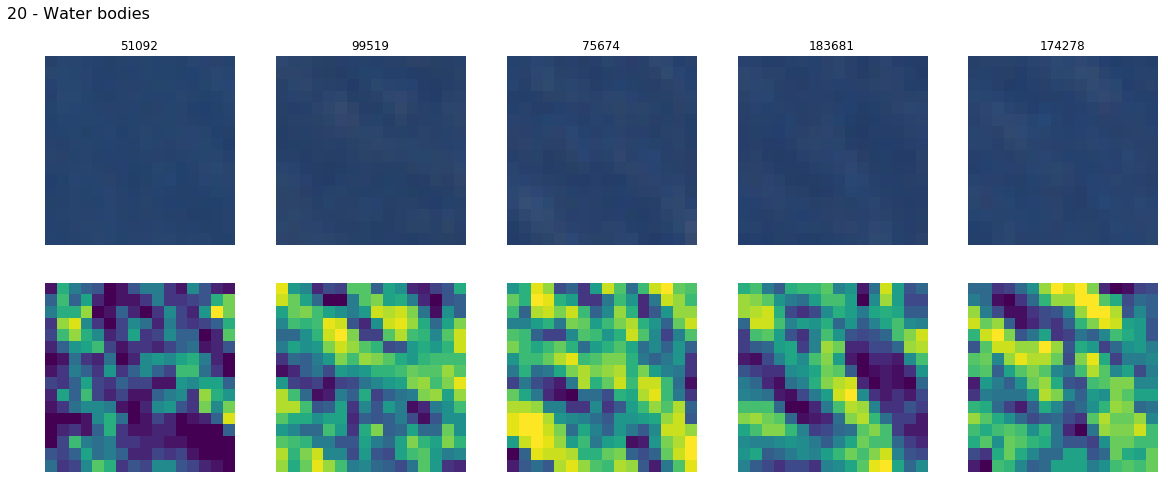

In [15]:
nb_of_patches = data["S2"].shape[0]

labels = data['TOP_LANDCOVER'][:,:][:]

# iteration over each class represented in the dataset
for i in [1, 2, 3, 4, 5, 6, 10, 11, 12, 14, 19, 20]:
    
    # creation of a new figure for each class
    fig = plt.figure(i, figsize=(20, 17))
    
    # we only select the patches that are from the correct class
    patches_of_class = np.where( labels == i )[0]
    
    # within all the relevant patches, we select five of them
    sample = np.random.choice(patches_of_class, 5, replace=False)
    
    # parameters to adjust the class title relative to the images
    plt.suptitle(str(i) + ' - ' + CLASSES_NAMES[i], x = 0.1, ha = 'left', fontsize = 16)
    plt.subplots_adjust(top=0.94, bottom = 0.6)
    
    columns = 5   # five samples on each line
    rows = 2      # one for RGB, one for IR
    plot_nb = 1   # initialisation of the plot counter
    
    for j in sample:
        
        # plot of the rgb image
        fig.add_subplot(rows, columns, plot_nb)
        patch_array = data["S2"][j,:,:,0:3]
        # histogram equalization of the rgb image
        patch_array = utils_visu.equalize_patch_hist(patch_array, cdf_rgb)
        plt.axis('off')
        plt.imshow(np.asarray(patch_array))
        plt.title(str(j))
        
        # plot of the ifrared image
        fig.add_subplot(rows, columns, plot_nb + columns)
        plt.axis('off')
        # histogram equalization of the infrared image
        ir_array = data["S2"][j,:,:,3]
        ir_array = utils_visu.equalize_patch_hist(ir_array, cdf_ir)
        plt.imshow(np.asarray(ir_array))
        
        plot_nb += 1
        
        

In [ ]:
CLASSES_COLORS = dict([
(0, [170, 240, 240]),
(1, [255, 255, 100]),
(2, [220, 240, 100]),
(3, [205, 205, 102]),
(4, [0, 100, 0]),
(5, [0, 160, 0]),
(6, [170, 200, 0]),
(7, [0, 60, 0]),
(8, [40, 100, 0]),
(9, [120, 130, 0]),
(10, [140, 160, 0]),
(11, [190, 150, 0]),
(12, [150, 100, 0]),
(13, [255, 180, 50]),
(14, [255, 235, 175]),
(15, [0, 120, 90]),
(16, [0, 150, 120]),
(17, [0, 220, 130]),
(18, [195, 20, 0]),
(19, [255, 245, 215]),
(20, [0, 70, 200]),
(21, [255, 255, 255]),
(22, [0, 0, 0]),
    ])